In [94]:
# set up the environment
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [ ]:
## modelling relationships

In [95]:
with open("ARM_data/child.iq/kidiq.dta") as f:
    df = pd.read_stata(f)
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


/Users/kallus/Applications/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


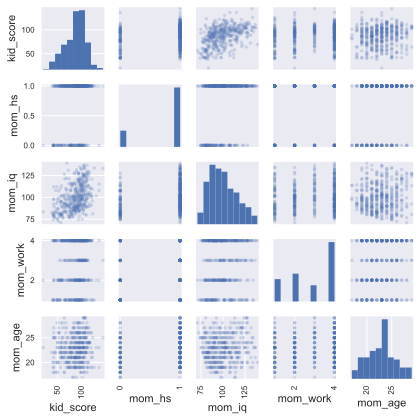

In [96]:
pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6))
tight_layout()

In [97]:
Y=df.kid_score
X=df[["mom_hs","mom_iq","mom_work","mom_age"]]

In [98]:
print Y

0       65
1       98
2       85
3       83
4      115
5       98
6       69
7      106
8      102
9       95
10      91
11      58
12      84
13      78
14     102
15     110
16     102
17      99
18     105
19     101
20     102
21     115
22     100
23      87
24      99
25      96
26      72
27      78
28      77
29      98
      ... 
404     96
405     65
406     64
407     95
408     56
409     75
410     91
411    106
412     76
413     90
414    108
415     86
416     85
417    104
418     87
419     41
420    106
421     76
422    100
423     89
424     42
425    102
426    104
427     59
428     93
429     94
430     76
431     50
432     88
433     70
Name: kid_score, Length: 434, dtype: int32


In [99]:
print X

     mom_hs      mom_iq  mom_work  mom_age
0       1.0  121.117529         4       27
1       1.0   89.361882         4       25
2       1.0  115.443165         4       27
3       1.0   99.449639         3       25
4       1.0   92.745710         4       27
5       0.0  107.901838         1       18
6       1.0  138.893106         4       20
7       1.0  125.145119         3       23
8       1.0   81.619526         1       24
9       1.0   95.073069         1       19
10      1.0   88.576998         1       23
11      1.0   94.859708         4       24
12      1.0   88.962801         4       27
13      1.0  114.114297         4       26
14      0.0  100.534072         2       24
15      1.0  120.419146         1       26
16      1.0  114.426877         3       23
17      1.0  111.592358         3       26
18      1.0  133.849227         4       20
19      0.0   97.264801         3       17
20      1.0  110.096806         4       21
21      1.0  126.723994         2       26
22      1.0

In [100]:
lm = sm.OLS(Y,sm.add_constant(X)).fit()
print lm.params

const       20.822612
mom_hs       5.561178
mom_iq       0.562081
mom_work     0.133729
mom_age      0.219860
dtype: float64


In [101]:
print lm.bse

const       9.187647
mom_hs      2.313455
mom_iq      0.060772
mom_work    0.767628
mom_age     0.332307
dtype: float64


In [102]:
print lm.cov_params()

              const    mom_hs    mom_iq  mom_work   mom_age
const     84.412860  3.524283 -0.321844 -0.714046 -2.289547
mom_hs     3.524283  5.352074 -0.035803 -0.378826 -0.133941
mom_iq    -0.321844 -0.035803  0.003693 -0.002039 -0.000590
mom_work  -0.714046 -0.378826 -0.002039  0.589252 -0.021550
mom_age   -2.289547 -0.133941 -0.000590 -0.021550  0.110428


In [103]:
sm.OLS(Y,sm.add_constant(X)).fit(use_t=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     29.38
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           1.31e-21
Time:                        16:05:52   Log-Likelihood:                -1871.7
No. Observations:                 434   AIC:                             3753.
Df Residuals:                     429   BIC:                             3774.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8226      9.188      2.266      0.023       2.815      38.830
mom_hs         5.5612      2.313      2.404      0.016       1.027      10.095
mom_iq         0.5621      0.061      9.249      0.000       0.443       0.681
mom_work       0.1337      0.768      0.174      0.862      -1.371       1.638
mom_age        0.2199      0.332      0.662      0.508      -0.431       0.871
==============================================================================
Omnibus:                        7.277   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.480
Skew:                          -0.313   Prob(JB):                       0.0238
Kurtosis:                       2.851   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
sm.OLS(Y,sm.add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     29.38
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           1.31e-21
Time:                        16:12:11   Log-Likelihood:                -1871.7
No. Observations:                 434   AIC:                             3753.
Df Residuals:                     429   BIC:                             3774.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8226      9.188      2.266      0.024       2.764      38.881
mom_hs         5.5612      2.313      2.404      0.017       1.014      10.108
mom_iq         0.5621      0.061      9.249      0.000       0.443       0.682
mom_work       0.1337      0.768      0.174      0.862      -1.375       1.643
mom_age        0.2199      0.332      0.662      0.509      -0.433       0.873
==============================================================================
Omnibus:                        7.277   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.480
Skew:                          -0.313   Prob(JB):                       0.0238
Kurtosis:                       2.851   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
smf.ols('kid_score ~ mom_hs+mom_iq+mom_work+mom_age', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     29.38
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           1.31e-21
Time:                        16:15:29   Log-Likelihood:                -1871.7
No. Observations:                 434   AIC:                             3753.
Df Residuals:                     429   BIC:                             3774.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8226      9.188      2.266      0.024       2.764      38.881
mom_hs         5.5612      2.313      2.404      0.017       1.014      10.108
mom_iq         0.5621      0.061      9.249      0.000       0.443       0.682
mom_work       0.1337      0.768      0.174      0.862      -1.375       1.643
mom_age        0.2199      0.332      0.662      0.509      -0.433       0.873
==============================================================================
Omnibus:                        7.277   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.480
Skew:                          -0.313   Prob(JB):                       0.0238
Kurtosis:                       2.851   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
df.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


In [109]:
smf.ols('kid_score ~ mom_hs', data=df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           5.96e-07
Time:                        16:15:57   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.5484      2.059     37.670      0.000      73.502      81.595
mom_hs        11.7713      2.322      5.069      0.000       7.207      16.336
==============================================================================
Omnibus:                       11.077   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.316
Skew:                          -0.373   Prob(JB):                      0.00349
Kurtosis:                       2.738   Cond. No.                         4.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
print df["kid_score"][df["mom_hs"]==1].mean()
print df["kid_score"][df["mom_hs"]==0].mean()
print df["kid_score"][df["mom_hs"]==1].mean() - df["kid_score"][df["mom_hs"]==0].mean()


89.3196480938
77.5483870968
11.7712609971


In [111]:
smf.ols('kid_score ~ mom_age', data=df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.688
Date:                Wed, 28 Feb 2018   Prob (F-statistic):             0.0555
Time:                        16:18:38   Log-Likelihood:                -1922.4
No. Observations:                 434   AIC:                             3849.
Df Residuals:                     432   BIC:                             3857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.9569      8.307      8.542      0.000      54.631      87.283
mom_age        0.6952      0.362      1.920      0.055      -0.016       1.407
==============================================================================
Omnibus:                       14.813   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.823
Skew:                          -0.463   Prob(JB):                     0.000366
Kurtosis:                       2.871   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
smf.ols('kid_score ~ mom_iq+mom_age', data=df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     55.08
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           4.98e-22
Time:                        16:19:49   Log-Likelihood:                -1874.9
No. Observations:                 434   AIC:                             3756.
Df Residuals:                     431   BIC:                             3768.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5962      9.084      1.937      0.053      -0.258      35.451
mom_iq         0.6036      0.059     10.275      0.000       0.488       0.719
mom_age        0.3881      0.326      1.190      0.235      -0.253       1.029
==============================================================================
Omnibus:                        7.598   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.786
Skew:                          -0.326   Prob(JB):                       0.0204
Kurtosis:                       2.924   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
smf.ols('kid_score ~ mom_iq', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           7.66e-23
Time:                        16:23:46   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7998      5.917      4.360      0.000      14.169      37.430
mom_iq         0.6100      0.059     10.423      0.000       0.495       0.725
==============================================================================
Omnibus:                        7.545   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.735
Skew:                          -0.324   Prob(JB):                       0.0209
Kurtosis:                       2.919   Cond. No.                         682.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# exploring collinearity
df2=df.copy()
df2['mom_iq2']=df['mom_iq']
df2['mom_iq3']=df['mom_iq']
smf.ols('kid_score ~ mom_iq+mom_iq2+mom_iq3', data=df2).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           7.66e-23
Time:                        16:23:34   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7998      5.917      4.360      0.000      14.169      37.430
mom_iq         0.2033      0.020     10.423      0.000       0.165       0.242
mom_iq2        0.2033      0.020     10.423      0.000       0.165       0.242
mom_iq3        0.2033      0.020     10.423      0.000       0.165       0.242
==============================================================================
Omnibus:                        7.545   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.735
Skew:                          -0.324   Prob(JB):                       0.0209
Kurtosis:                       2.919   Cond. No.                     3.34e+32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-58. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
smf.ols('kid_score ~ mom_iq+mom_iq2+mom_iq3', data=df2).fit().params[["mom_iq","mom_iq2","mom_iq3"]].sum()

0.6125610521604585

In [119]:
# exploring collinearity
np.random.seed(200)
df2=df.copy()
df2['mom_iq2']=df['mom_iq']+0.001*np.random.randn(len(df['mom_iq']))
df2['mom_iq3']=df['mom_iq']+0.001*np.random.randn(len(df['mom_iq']))
smf.ols('kid_score ~ mom_iq+mom_iq2+mom_iq3', data=df2).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     37.28
Date:                Wed, 28 Feb 2018   Prob (F-statistic):           1.96e-21
Time:                        16:26:59   Log-Likelihood:                -1874.1
No. Observations:                 434   AIC:                             3756.
Df Residuals:                     430   BIC:                             3773.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5801      5.912      4.327      0.000      13.960      37.201
mom_iq     -2148.8198   1257.800     -1.708      0.088   -4621.020     323.380
mom_iq2     1179.4856    886.719      1.330      0.184    -563.358    2922.329
mom_iq3      969.9468    908.554      1.068      0.286    -815.813    2755.707
==============================================================================
Omnibus:                        7.769   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.968
Skew:                          -0.330   Prob(JB):                       0.0186
Kurtosis:                       2.924   Cond. No.                     3.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
smf.ols('kid_score ~ C(mom_work)', data=df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.590
Date:                Wed, 28 Feb 2018   Prob (F-statistic):             0.0138
Time:                        16:34:53   Log-Likelihood:                -1918.9
No. Observations:                 434   AIC:                             3846.
Df Residuals:                     430   BIC:                             3862.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           82.0000      2.305     35.568      0.000      77.469      86.531
C(mom_work)[T.2]     3.8542      3.095      1.245      0.214      -2.229       9.937
C(mom_work)[T.3]    11.5000      3.553      3.237      0.001       4.517      18.483
C(mom_work)[T.4]     5.2098      2.704      1.927      0.055      -0.105      10.524
==============================================================================
Omnibus:                       12.371   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.950
Skew:                          -0.411   Prob(JB):                      0.00154
Kurtosis:                       2.796   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""